In [1]:
!pip install tensorflow

In [3]:
import tensorflow as tf

Loading MNIST data set
Containing Training Samples=60,000 and Testing Samples=10,000
Tensorflow already contains MNIST data set which can be loaded using Keras

In [6]:
mnist = tf.keras.datasets.mnist ##basically al handwritten characters

After Loading MNIST data set , divide into train and test datasets

In [8]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
!pip install matplotlib

In [11]:
import matplotlib.pyplot as plt

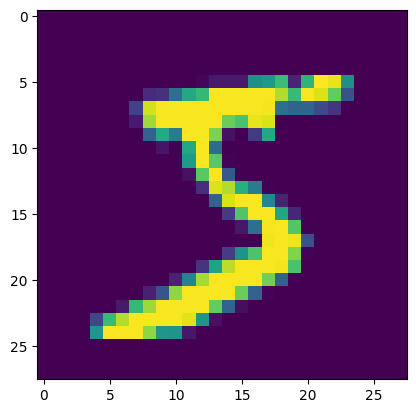

In [12]:
plt.imshow(x_train[0])

In [13]:
plt.show()

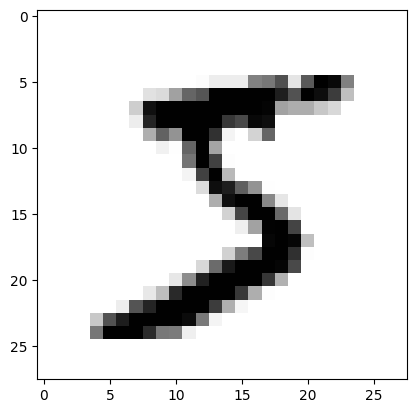

In [14]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

## checking the values of each pixel
## Before Normalization

##Preprocessing step

In [15]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

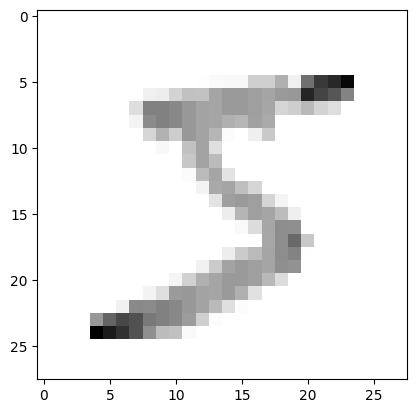

In [17]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap=plt.cm.binary)

## after normalization

In [19]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [20]:
print(y_train[0])

5


In [21]:
!pip install numpy

In [22]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training Samples dimension", x_trainr.shape)
print("Testing samples dimension", x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing samples dimension (10000, 28, 28, 1)


## creating a Deep Neural Network

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation, Flatten, Conv2D, MaxPooling2D

In [41]:
## creating neural network 
model= Sequential()

###First Convolution Layer
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

###Second Convolution Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

###3rd convolution Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


###Fully Connected Layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))


##Fully Connected Layer
model.add(Dense(32))
model.add(Activation("relu"))

##Last fully Conneted Layer
model.add(Dense(10))
model.add(Activation('softmax'))

In [42]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
 print("Total Training Samples=", len(x_trainr))

Total Training Samples= 60000


In [44]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [45]:
model.fit(x_trainr, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7713 - loss: 0.6891 - val_accuracy: 0.9617 - val_loss: 0.1224
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9658 - loss: 0.1133 - val_accuracy: 0.9681 - val_loss: 0.1011
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9773 - loss: 0.0762 - val_accuracy: 0.9763 - val_loss: 0.0772
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9815 - loss: 0.0587 - val_accuracy: 0.9771 - val_loss: 0.0746
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9840 - loss: 0.0507 - val_accuracy: 0.9783 - val_loss: 0.0699


In [46]:
## Evaluating on testing data set MNIT
test_loss, test_acc=model.evaluate(x_testr, y_test)
print("Test loss on 10,000 test samples",test_loss)
print("Validation accurracy on 10,000 test samples",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9733 - loss: 0.0892
Test loss on 10,000 test samples 0.06995902955532074
Validation accurracy on 10,000 test samples 0.9790999889373779


In [47]:
predicions = model.predict([x_testr])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [48]:
print(predicions)

[[2.7203773e-09 9.8497921e-06 5.0283084e-05 ... 9.9993575e-01
  3.5501255e-09 1.1457201e-06]
 [1.1049517e-04 2.2613726e-06 9.9965370e-01 ... 5.3996710e-06
  1.2756291e-06 1.9285042e-06]
 [2.0894919e-05 9.9969316e-01 1.2402269e-05 ... 9.0407906e-05
  1.9551782e-05 2.6882069e-06]
 ...
 [3.9489734e-08 2.1574235e-06 2.3316035e-08 ... 3.1076990e-05
  1.9754869e-05 8.7360298e-05]
 [1.9850322e-05 1.1100692e-06 9.5843049e-08 ... 2.6513840e-07
  2.5102001e-04 1.0785538e-05]
 [2.2576604e-04 2.2795327e-06 4.4911872e-03 ... 3.7236035e-07
  2.2833572e-05 9.2608439e-05]]


In [50]:
print(np.argmax(predicions[0]))

7


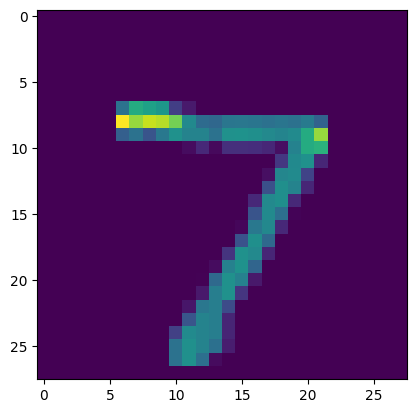

In [52]:
plt.imshow(x_test[0])

In [53]:
print(np.argmax(predicions[128]))

8


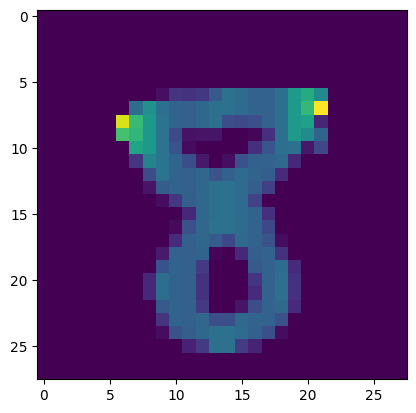

In [56]:
plt.imshow(x_test[128])

In [58]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [2]:
model.save('mnist_model.keras')


NameError: name 'model' is not defined

In [63]:
def preprocess_image(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)
    normalized = resized / 255.0
    reshaped = np.reshape(normalized, (1, 28, 28, 1))
    return reshaped


In [78]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Preprocess the frame
    processed_frame = preprocess_image(frame)
    
    # Make prediction
    prediction = np.argmax(model.predict(processed_frame), axis=-1)
    
    # Display the frame with prediction
    cv2.putText(frame, str(prediction), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Handwritten Digit Recognition', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
